### USL MINI PROJECT

In [121]:
# IMPORTING THE NEEDED LIBRARIES
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# train test split
from sklearn.model_selection import train_test_split

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
plt.rcParams['figure.figsize'] = [15,8]

In [282]:
 # READING THE DATASET :
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,True,False


In [141]:
df.shape

(12330, 18)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [143]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [144]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [145]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [146]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [147]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Administrative,0,0.000000
Administrative_Duration,0,0.000000
Weekend,0,0.000000
VisitorType,0,0.000000
TrafficType,0,0.000000
Region,0,0.000000
Browser,0,0.000000
OperatingSystems,0,0.000000
Month,0,0.000000
SpecialDay,0,0.000000


In [148]:
# THE DATA CONTAINS NO MISSING VALUE SO NO TREATMENT IS NEEDED.

In [149]:
df.duplicated().value_counts()

False    12205
True       125
dtype: int64

In [150]:
df.drop_duplicates(inplace=True)

In [151]:
df.shape

(12205, 18)

In [152]:
df.duplicated().value_counts()

False    12205
dtype: int64

In [153]:
# NOW THERE ARE NO DUPLICATED VALUES .

#### The 'Revenue' attribute can be used as the class label.

In [154]:
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

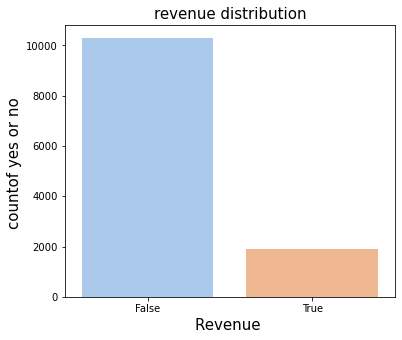

In [98]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'pastel')
plt.title('revenue distribution', fontsize = 15)
plt.xlabel('Revenue ', fontsize = 15)
plt.ylabel('countof yes or no ', fontsize = 15)
plt.show()

In [99]:
df['Weekend'].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

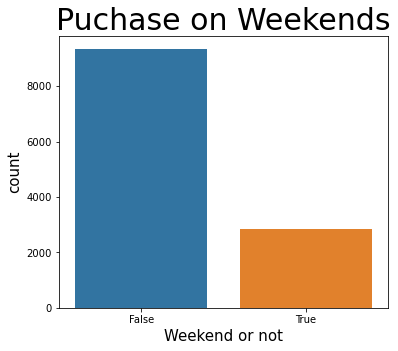

In [100]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'])
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

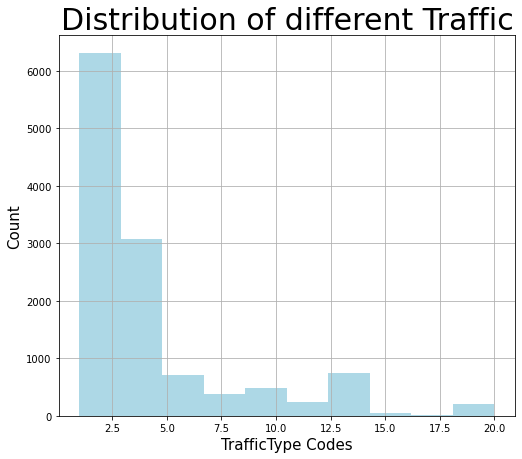

In [18]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

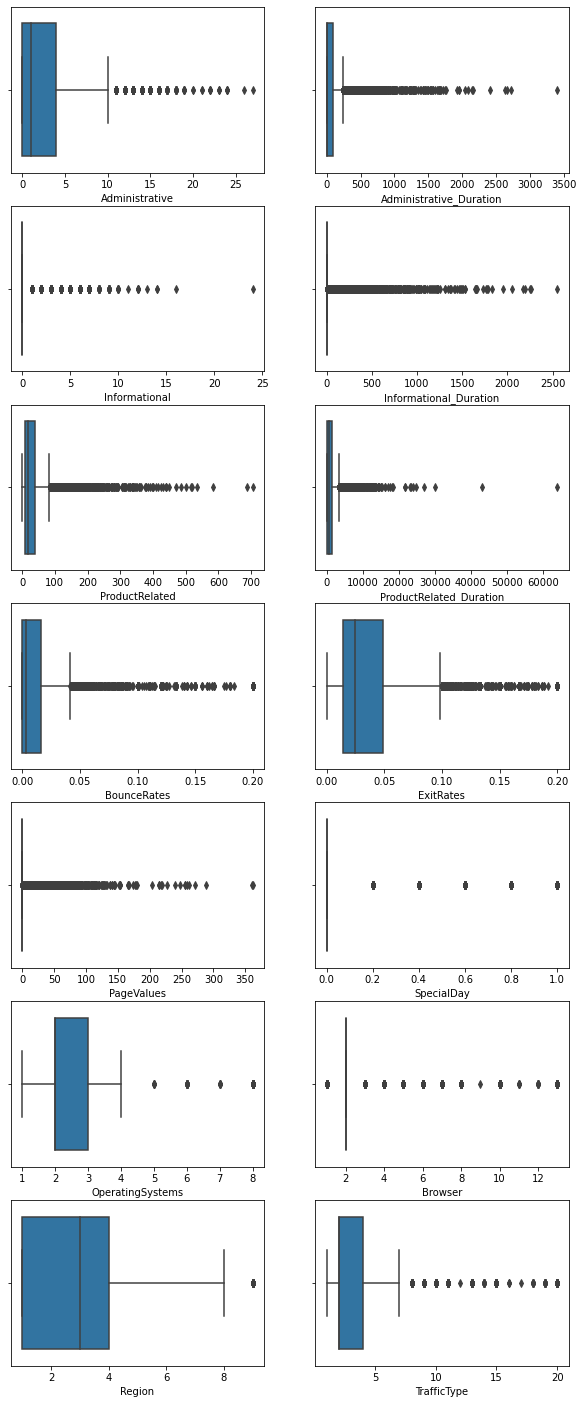

In [101]:
# consider the numeric variables
df_num = df.select_dtypes(include=[np.number])
i=0
# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize=(20,13))
title = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']
# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    fig.set_size_inches(10,25)
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_num[variable], ax = subplot)

# display the plot
plt.show()

In [102]:
df_num = df.select_dtypes(include=[np.number])
df_num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

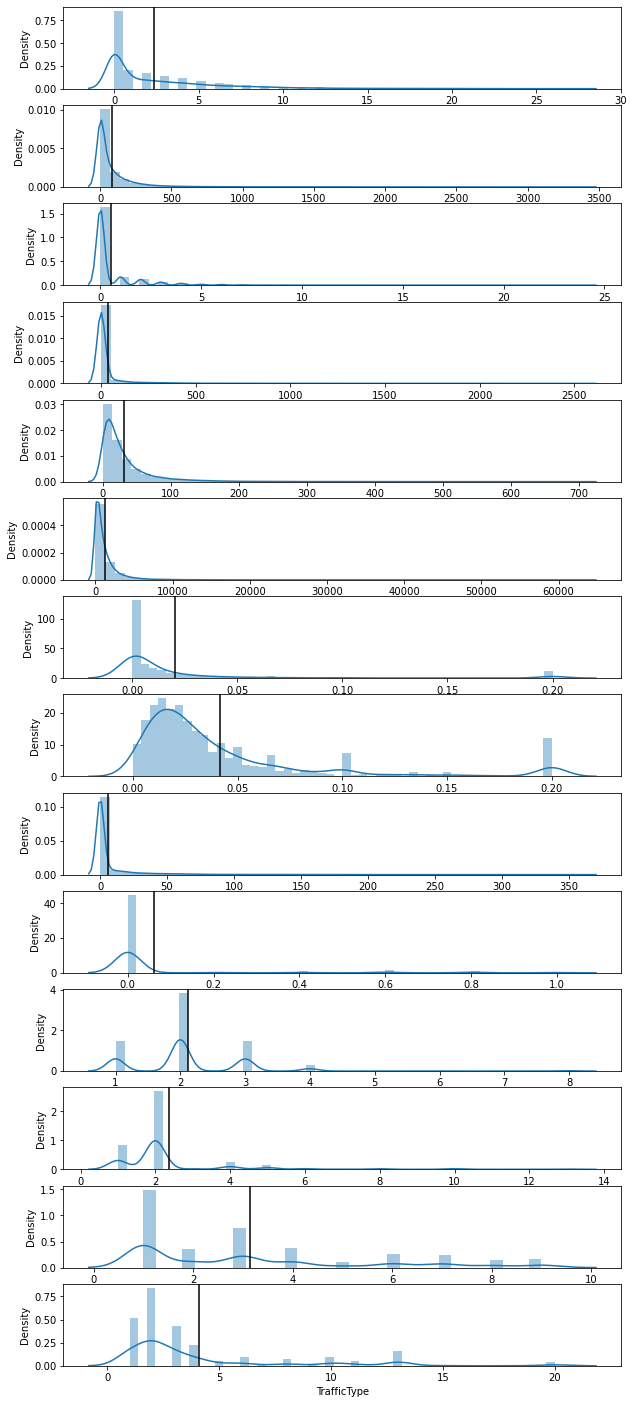

In [103]:
num = df.select_dtypes(include=np.number)  # Get numeric columns
n = num.shape[1]  # Number of cols

fig, axes = plt.subplots(14,1, figsize=(25,18))  # create subplots
fig.set_size_inches(10,25)

for ax, col in zip(axes, num):  # For each column...
    sns.distplot(num[col], ax=ax)   # Plot histogaerm
    ax.axvline(num[col].mean(), c='k')  # Plot mean
plt.show()

In [104]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

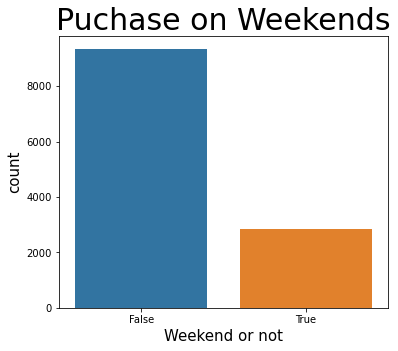

In [105]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'])
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

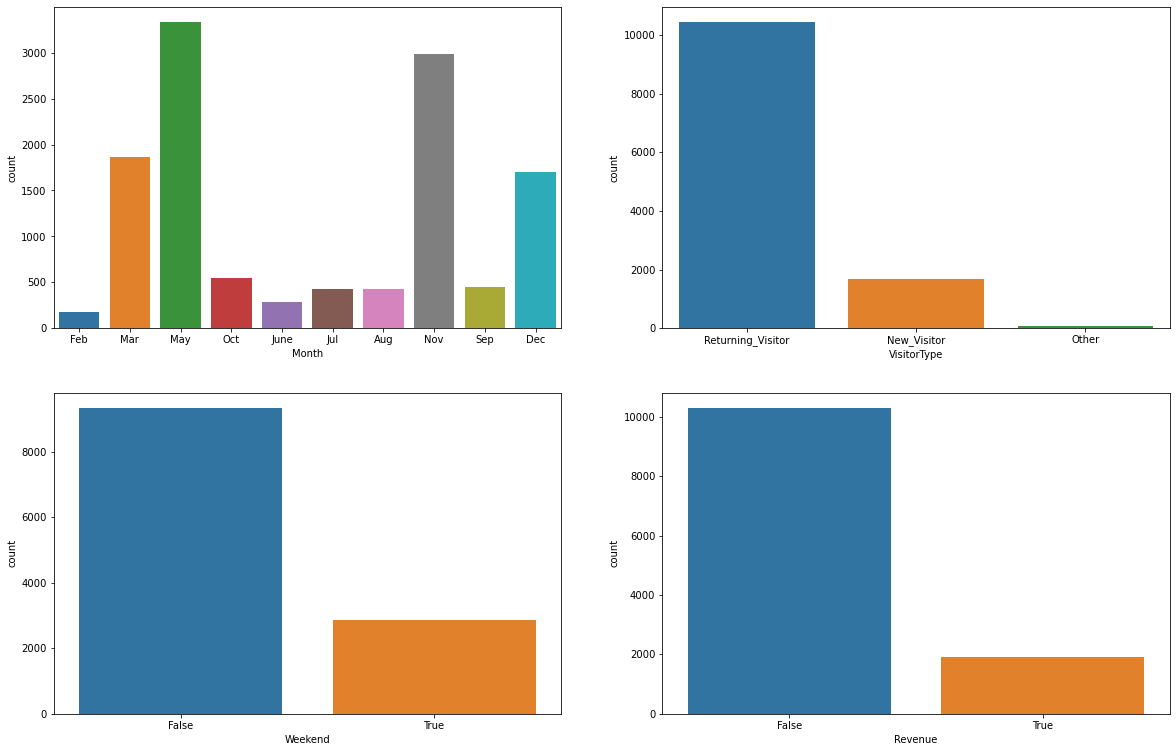

In [106]:

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,13))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_cat.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df_cat[variable], ax = subplot)

# display the plot
plt.show()

In [107]:
df['OperatingSystems'].value_counts()

2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

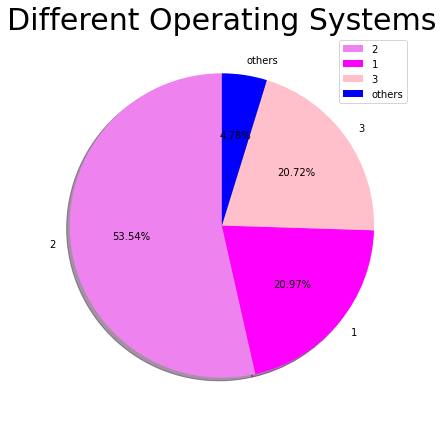

In [108]:
# plotting a pie chart for Operating Systems

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [27]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [ ]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [72]:
# BIVARIATE ANALYSIS WITH THE REVENUE COLUMN

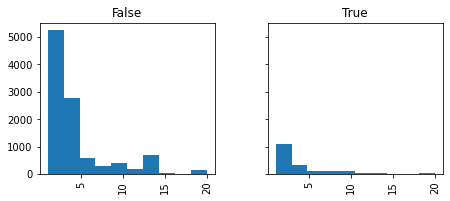

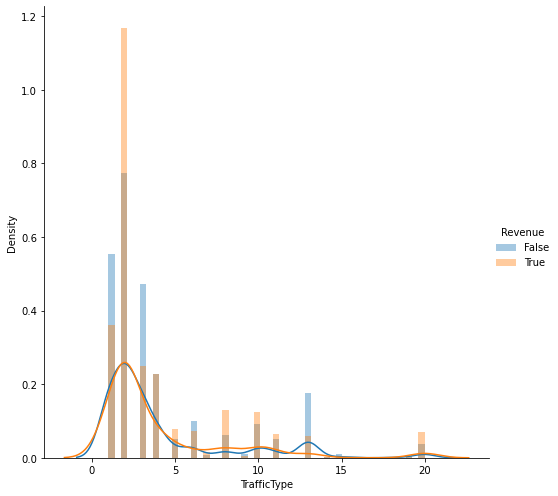

In [73]:
df.hist(column='TrafficType', by='Revenue', sharex=True, sharey=True, figsize=(7,7), layout=(2,2))
plt.show()

g = sns.FacetGrid(df, hue='Revenue', height=7)
g.map(sns.distplot, 'TrafficType', label='Revenue')
g.add_legend()
plt.show()

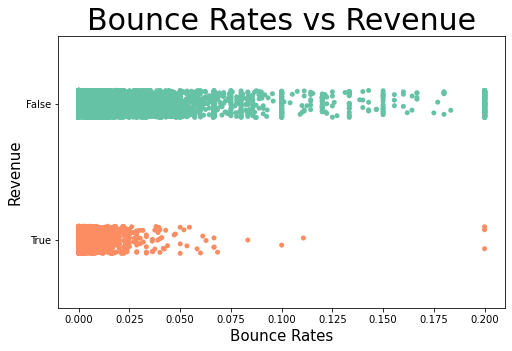

In [75]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['BounceRates'], df['Revenue'], palette = 'Set2', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

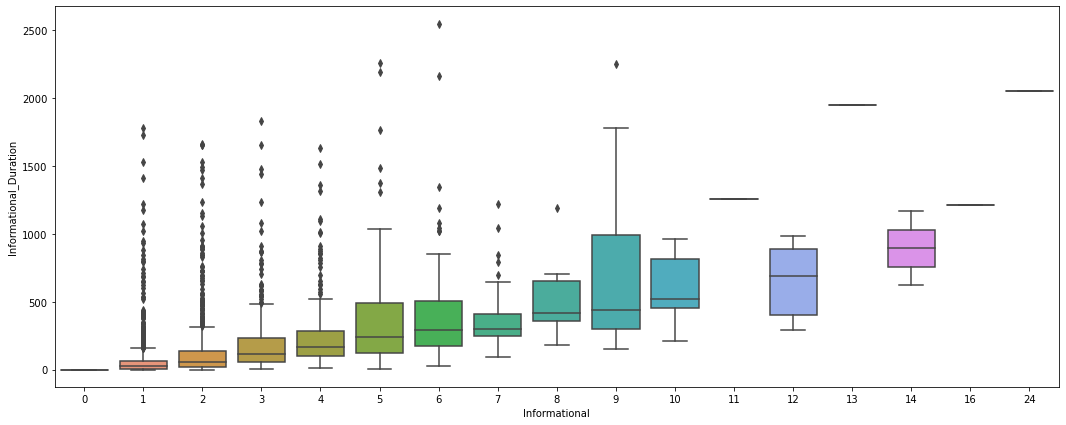

In [29]:
# boxplot for informaational and informational duration
sns.boxplot(x=df.Informational,y=df.Informational_Duration)

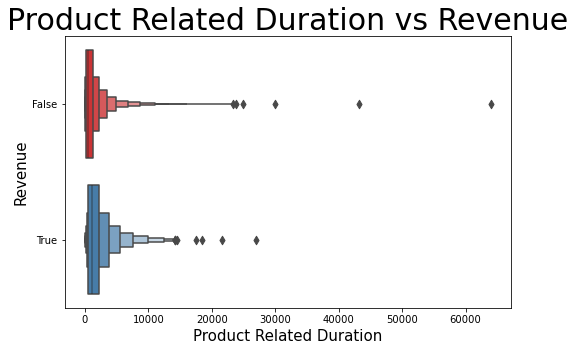

In [76]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['ProductRelated_Duration'], df['Revenue'], palette = 'Set1', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

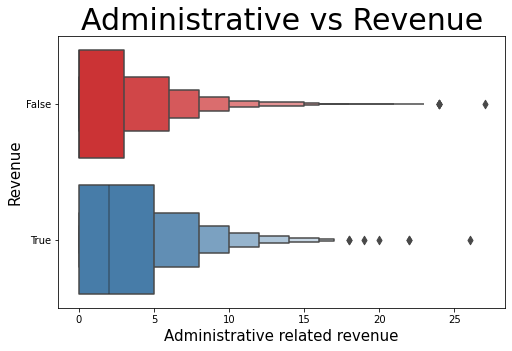

In [82]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['Administrative'], df['Revenue'], palette = 'Set1', orient = 'h')
plt.title('Administrative vs Revenue', fontsize = 30)
plt.xlabel('Administrative related revenue', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

In [80]:
df.Administrative.value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

In [31]:
df['Region'].value_counts()

1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64

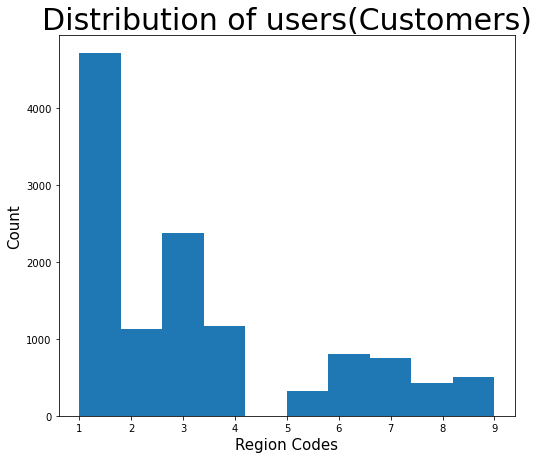

In [34]:

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['Region'])
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()


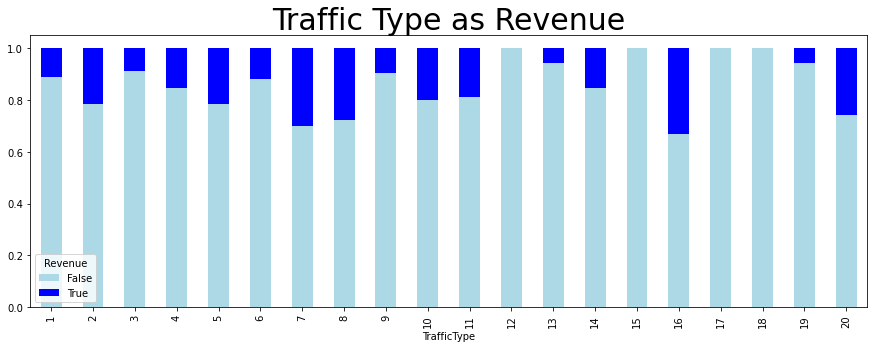

In [35]:
# bar plot for traffic type vs revenue

data = pd.crosstab(df['TrafficType'], df['Revenue'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type as Revenue', fontsize = 30)
plt.show()

#### Multi-variate Analysis

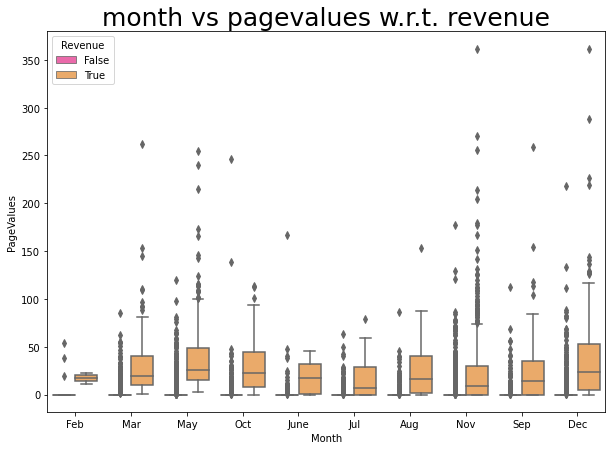

In [36]:
#month vs pagevalues w.r.t. revenue
# boxplot for month vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'spring')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

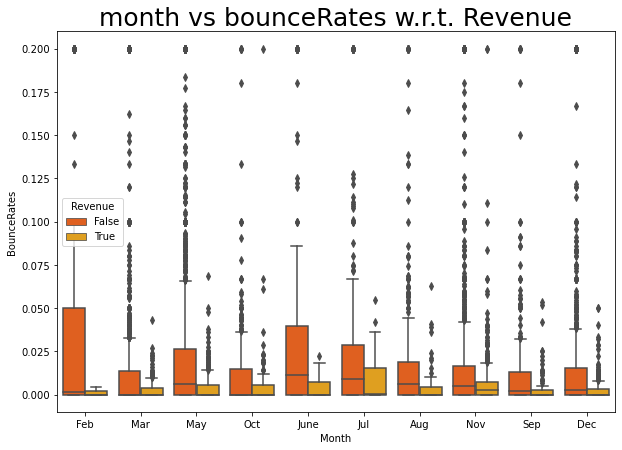

In [37]:
# month vs bounceRates w.r.t. Revenue

# boxplot for month vs bounceRates w.r.t. Revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'autumn')
plt.title("month vs bounceRates w.r.t. Revenue", fontsize = 25)
plt.show()

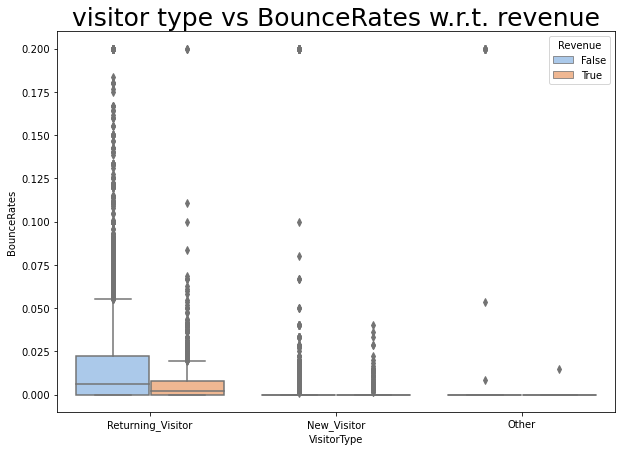

In [38]:

# visitor type vs BounceRates w.r.t. revenue

# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'pastel')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 25)
plt.show()

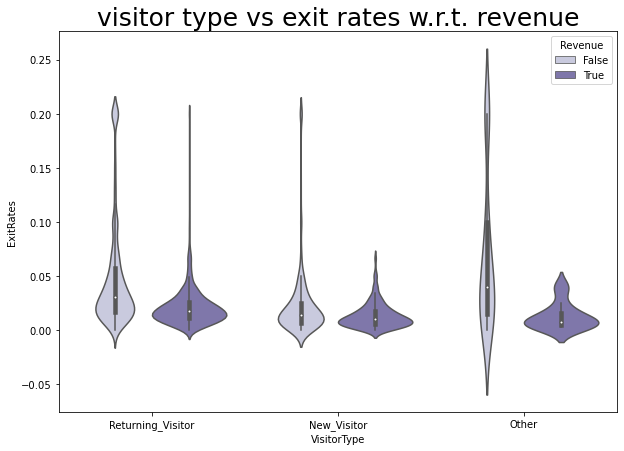

In [40]:
# violin plot for visitor type vs exit rates wrt revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()


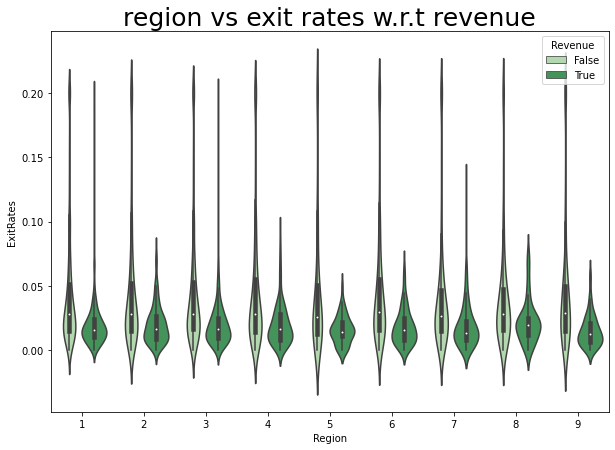

In [42]:

# region vs exit rates w.r.t. revenue

# violin plot for rigion vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Greens')
plt.title("region vs exit rates w.r.t revenue", fontsize = 25)
plt.show()

In [171]:
# CORRELATION PLOT
display(df.corr())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,0.094423,-0.006586,-0.025622,-0.007262,-0.034643,-0.023492,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,0.056250,-0.007529,-0.015742,-0.006729,-0.014991,-0.022407,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,0.062173,-0.009721,-0.038787,-0.030317,-0.035197,0.057319,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,0.043552,-0.009734,-0.019573,-0.027891,-0.025126,0.045596,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.154323,0.004194,-0.013586,-0.040108,-0.044223,0.129521,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.135882,0.002870,-0.007724,-0.034869,-0.037390,0.121887,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,-0.054076,0.026811,-0.015501,0.002787,0.089184,0.132442,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,-0.086049,0.016345,-0.003323,-0.000987,0.087478,0.177935,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.066244,0.018632,0.045908,0.010588,0.012286,-0.110323,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,-0.259992,0.012806,0.003528,-0.016450,0.052856,0.086615,-0.017723,-0.083601


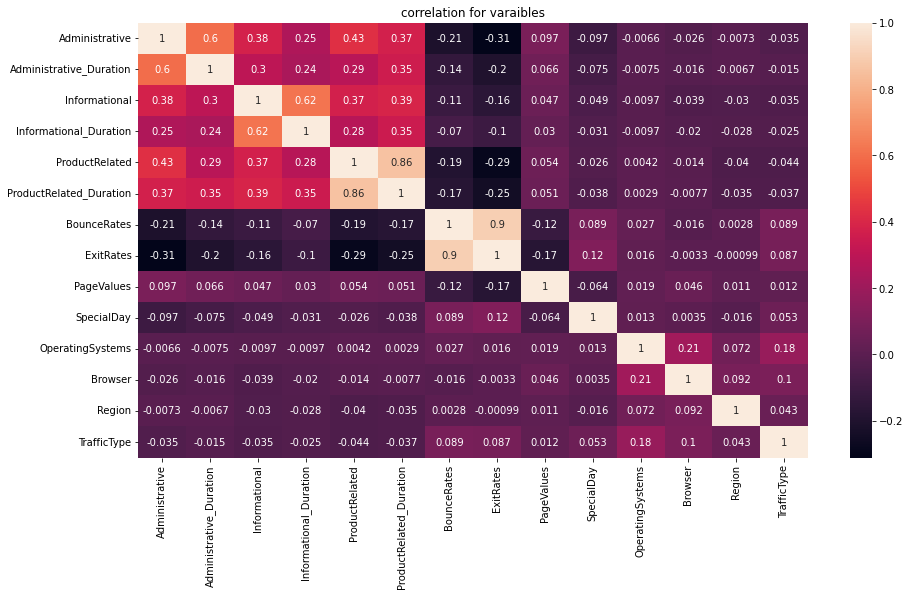

In [174]:
# the heatmap for correlation of the variables
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),annot=True)
plt.title("correlation for varaibles")
plt.show()

### Perform required encoding techniques

In [159]:
le=LabelEncoder()
df.VisitorType=le.fit_transform(df.VisitorType)
df.Weekend=le.fit_transform(df.Weekend)
df.Revenue=le.fit_transform(df.Revenue)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [289]:
df_num = df.select_dtypes(include=[np.number])
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,1,1,1,1
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,4,1,9,3
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,3,2,2,4
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,3,3,1,4


#### DETECTION AND REMOVAL OF OUTLIERS

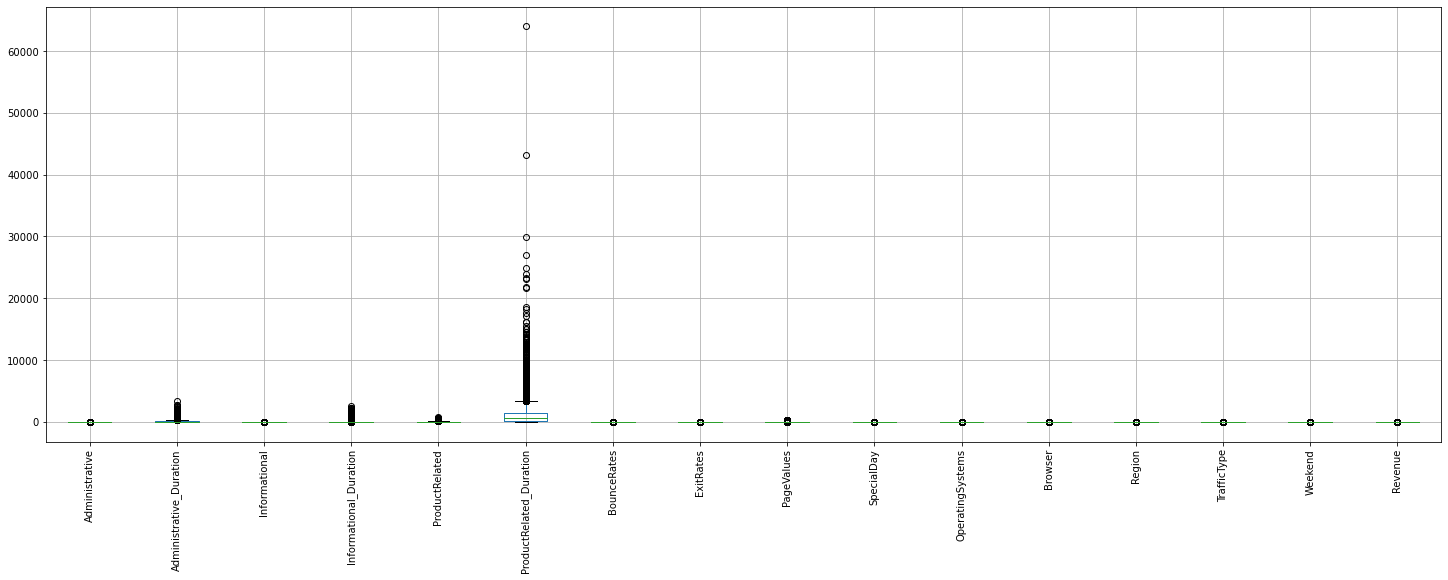

In [112]:
plt.figure(figsize=(25,8))
fig.set_size_inches(10,5)
df.boxplot()
plt.xticks(rotation=90);

In [136]:
out_per = []
for i in df_num.columns:
    data_mean, data_std = mean(df_num[i]), std(df_num[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
   

    # identify outliers
    outliers = [x for x in df_num[i] if x < lower or x > upper]
    num_out = len(outliers)
    print(i)
    print('Identified outliers:',num_out)
    print()

Administrative
Identified outliers: 213

Administrative_Duration
Identified outliers: 230

Informational
Identified outliers: 260

Informational_Duration
Identified outliers: 229

ProductRelated
Identified outliers: 236

ProductRelated_Duration
Identified outliers: 217

BounceRates
Identified outliers: 593

ExitRates
Identified outliers: 599

PageValues
Identified outliers: 257

SpecialDay
Identified outliers: 478

OperatingSystems
Identified outliers: 107

Browser
Identified outliers: 371

Region
Identified outliers: 0

TrafficType
Identified outliers: 221



#### TREATMENT OF OUTLIERS 

In [285]:
# calculate the first quartile
Q1 = df_num.quantile(0.25)

# calculate the third quartile
Q3 = df_num.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

IQR

Administrative               4.000000
Administrative_Duration     93.256250
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              31.000000
ProductRelated_Duration   1280.019714
BounceRates                  0.016813
ExitRates                    0.035714
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             1.000000
Browser                      0.000000
Region                       3.000000
TrafficType                  2.000000
dtype: float64

In [278]:
IQR

Administrative               4.000000
Administrative_Duration     94.700000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              30.000000
ProductRelated_Duration   1284.154762
BounceRates                  0.016667
ExitRates                    0.034298
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             1.000000
Browser                      0.000000
Region                       3.000000
TrafficType                  2.000000
VisitorType                  0.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [286]:
df_num = df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_num.shape

(2550, 14)

In [288]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,2
5,0,0.000000,0,0.000000,19,154.216667,0.015789,0.024561,0.000000,0.000000,2,2,1,3
14,0,0.000000,0,0.000000,2,68.000000,0.000000,0.100000,0.000000,0.000000,3,2,3,3
18,0,0.000000,0,0.000000,2,32.000000,0.000000,0.100000,0.000000,0.000000,2,2,1,3
22,0,0.000000,0,0.000000,3,105.000000,0.000000,0.033333,0.000000,0.000000,3,2,1,5


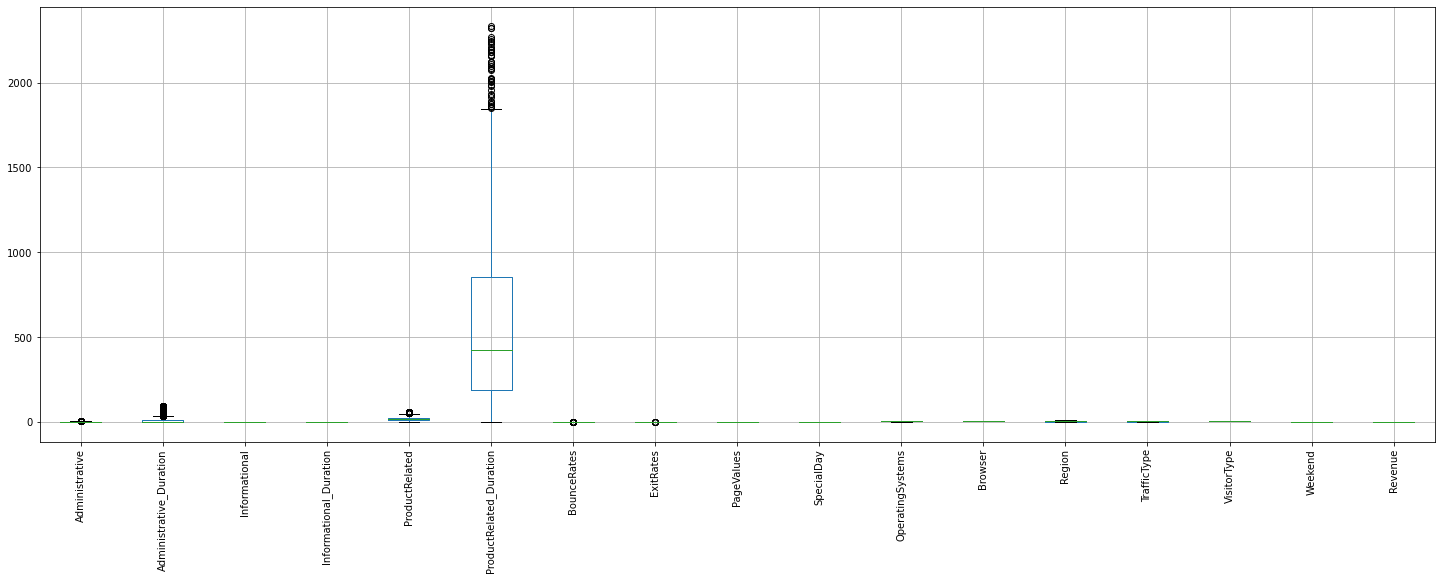

In [84]:
plt.figure(figsize=(25,8))
fig.set_size_inches(10,5)
df1.boxplot()
plt.xticks(rotation=90);

In [126]:
dff.Revenue.value_counts()

0    1521
Name: Revenue, dtype: int64

In [119]:
# WHEN WE REMOVE THE OUTLIER IT REMOVES THE ENTIRE CLASS 
#SINCE THE OUTLIERS IN TTHE PRODUCTVRELATED DURATION COLUMN IN ENHANCED COMPARED TO OTHER COLUMNS
# WE ARE PROCEEDING WITHOUT OUTLIER REMOVAL

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [155]:
df.Revenue.value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

### 	Perform appropriate scaling

In [157]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
Cat_col = ['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


feature_scale = [feature for feature in df.columns if feature not in Cat_col]


scaler = StandardScaler()
scaler.fit(df[feature_scale])

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [161]:
df.Month.replace({'June':'Jun'},inplace=True)

In [162]:
df.Month.value_counts()

May    3329
Nov    2982
Mar    1860
Dec    1706
Oct     549
Sep     448
Aug     433
Jul     432
Jun     285
Feb     181
Name: Month, dtype: int64

In [163]:
df.Month=pd.to_datetime(df.Month,format='%b').dt.month

In [164]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,2,1,1,1,1,2,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,2,1,2,2,0,0


In [166]:
df.Month.value_counts()

5     3329
11    2982
3     1860
12    1706
10     549
9      448
8      433
7      432
6      285
2      181
Name: Month, dtype: int64

In [ ]:
d = df.drop('')

In [176]:
ss=StandardScaler()
df_scaled =pd.DataFrame(ss.fit_transform(X),columns=X.columns)
df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.673504,-1.239776,-0.794017,-0.896370,-0.765321,0.409670,-0.553088
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.310240,-1.673504,-0.136980,-0.209237,-0.896370,-0.516347,0.409670,-0.553088
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.673504,2.068612,-0.794017,2.433853,-0.267374,0.409670,-0.553088
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.310240,-1.673504,0.965816,-0.209237,-0.480092,-0.018400,0.409670,-0.553088
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.310240,-1.673504,0.965816,0.375543,-0.896370,-0.018400,0.409670,1.808031


#### BUILDING THE DIFFERENT CLUSTER MODELS 

In [175]:
y = df.Revenue
X = df.drop('Revenue',axis=1)

In [ ]:
#Spliting the dependent and independent variables.
from sklearn.model_selection import train_test_split

In [177]:
X= df_scaled
y= df.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state = 42)

In [178]:
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (9764, 17)
Input Test: (2441, 17)
Output Training: (9764,)
Output Test: (2441,)


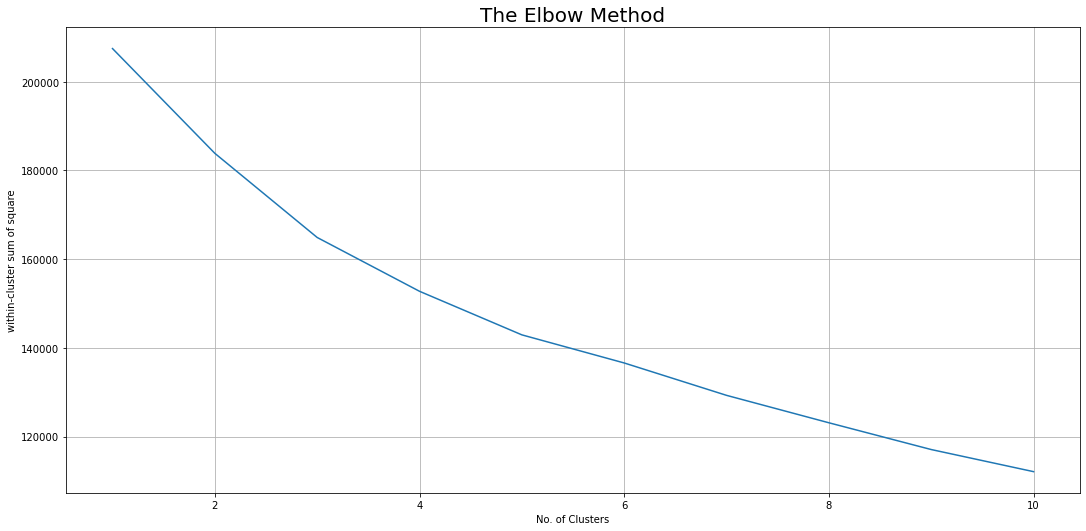

In [179]:
x = data.values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(X)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

<AxesSubplot:>

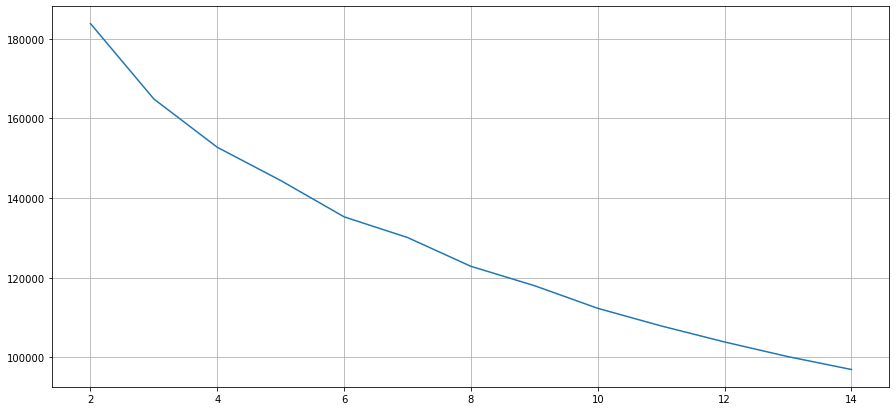

In [194]:
elb=[]
sil=[]
for i in range(2,15):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(X)
    elb.append(km.inertia_)
    sil.append(silhouette_score(X,km.predict(X)))
    plt.grid()
sns.lineplot(x=range(2,15),y=elb)

In [197]:
wcss  = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

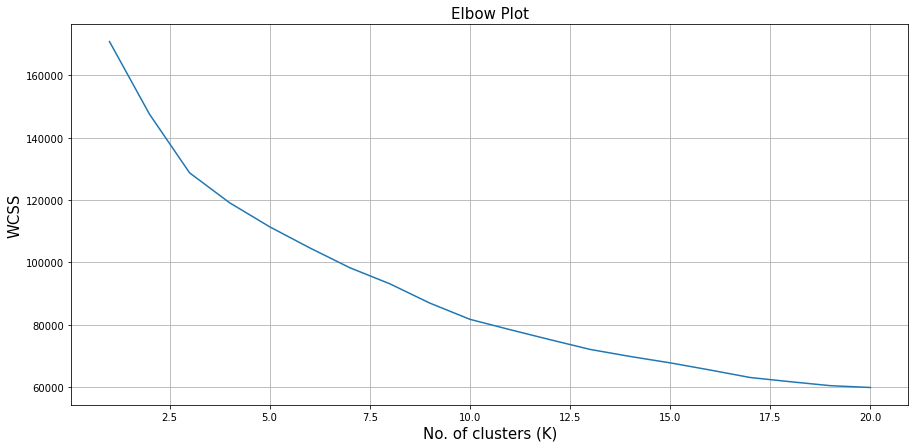

In [195]:
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.grid()
# display the plot
plt.show()

In [184]:
ss=StandardScaler()
df_num_scaled =pd.DataFrame(ss.fit_transform(df_num),columns=df_num.columns)
df_num_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.239776,-0.794017,-0.896370,-0.765321
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.310240,-0.136980,-0.209237,-0.896370,-0.516347
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,2.068612,-0.794017,2.433853,-0.267374
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.310240,0.965816,-0.209237,-0.480092,-0.018400
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.310240,0.965816,0.375543,-0.896370,-0.018400


In [202]:
df_num_scaled.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64

In [185]:
wcss  = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_num_scaled)
    wcss.append(kmeans.inertia_)

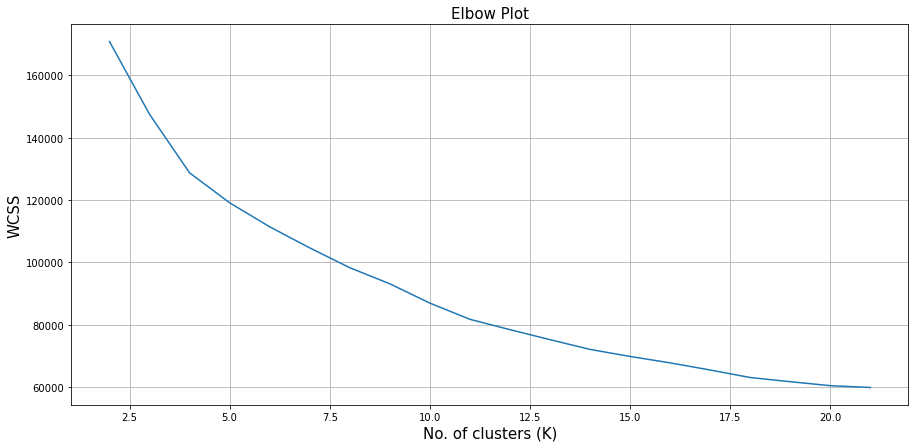

In [196]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(2,22), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.grid()
# display the plot
plt.show()

### Optimal Value of K Using Silhouette Score

In [198]:
n_clusters = [2, 3, 4, 5, 6]


for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_num)
    score = silhouette_score(df_num, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.7807777091769754)
For 3 clusters the silhouette score is 0.6943238592257756)
For 4 clusters the silhouette score is 0.6743756919260848)
For 5 clusters the silhouette score is 0.6205851959543323)
For 6 clusters the silhouette score is 0.6049063053319645)


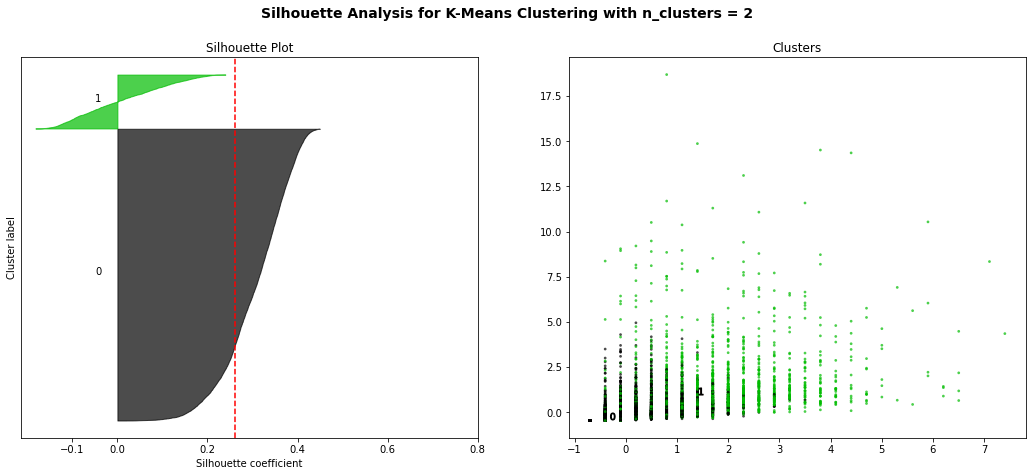

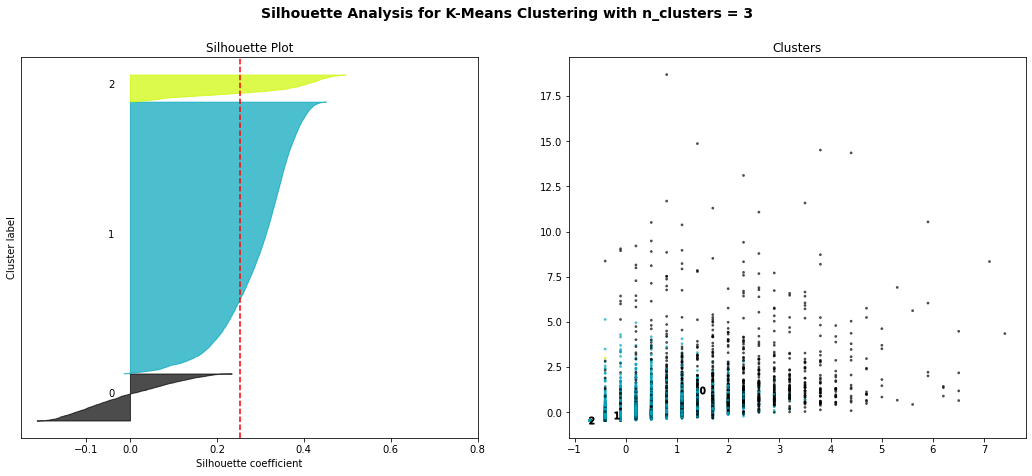

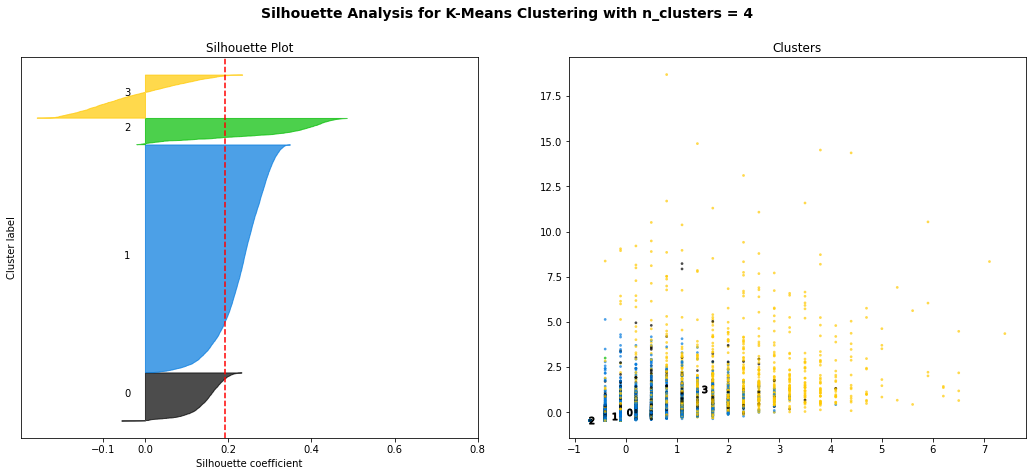

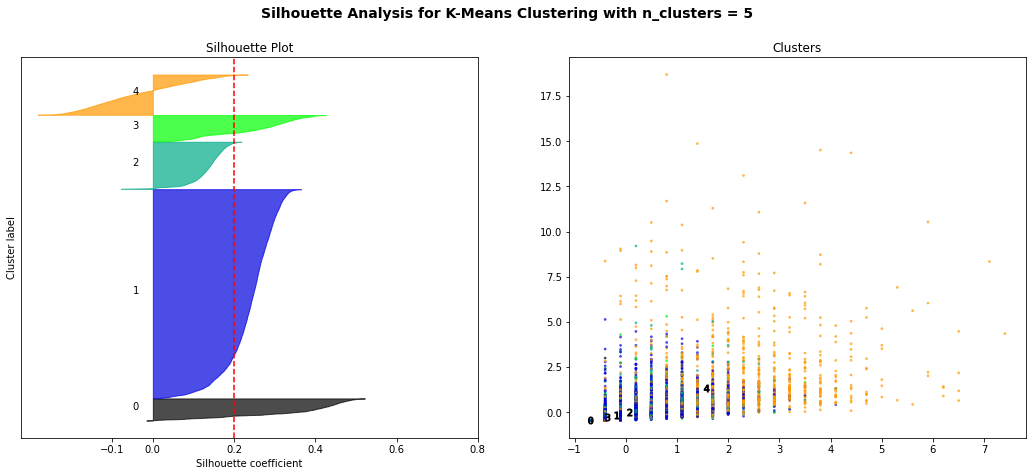

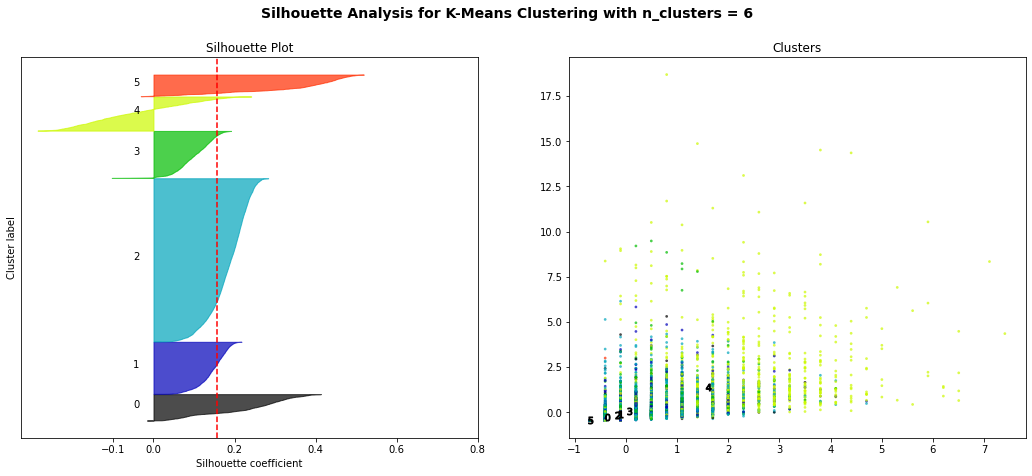

In [201]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

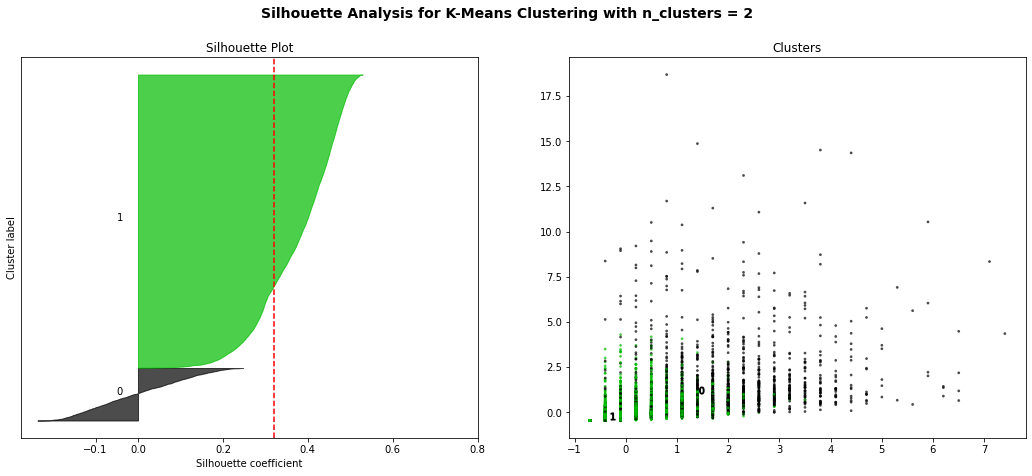

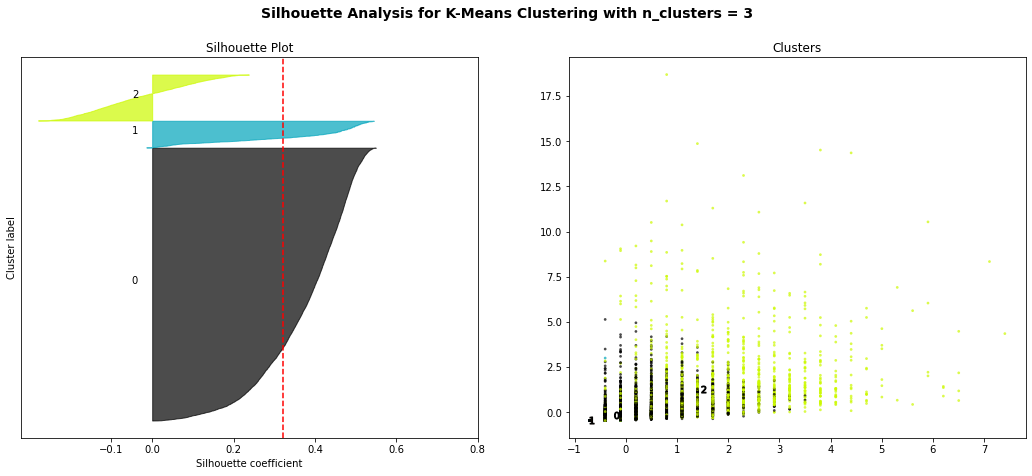

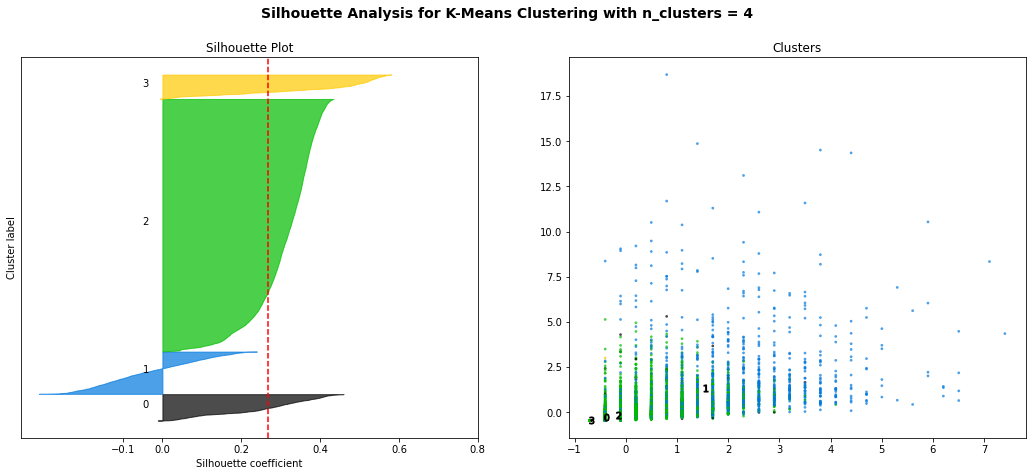

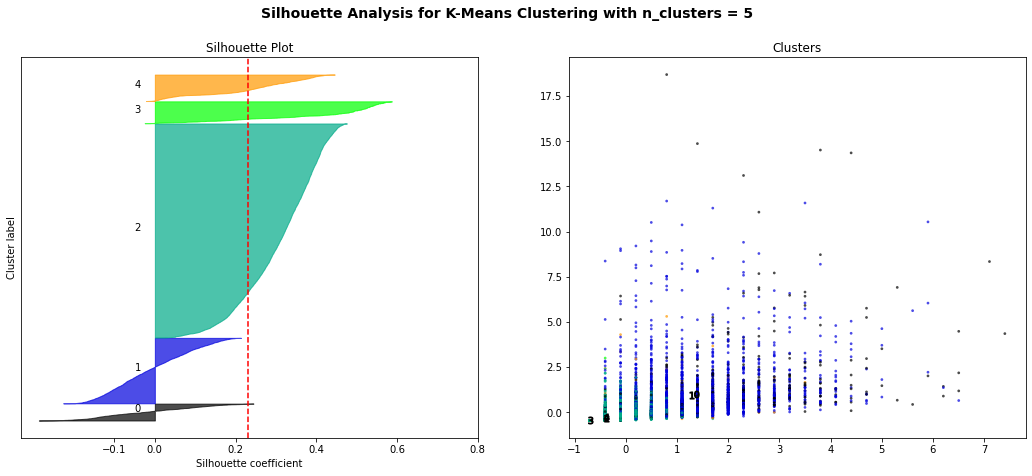

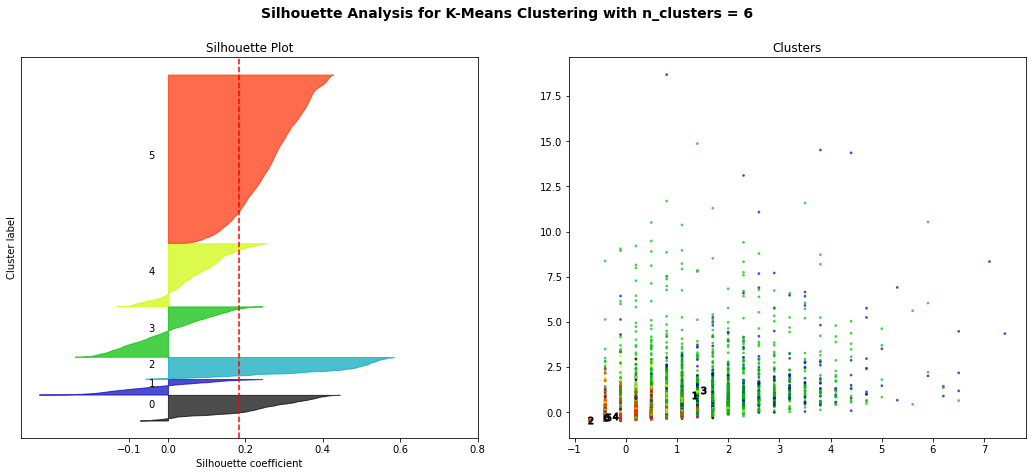

In [203]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
X1 = np.array(df_num_scaled)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X1)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X1, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [204]:
# build a K-Means model with 6 clusters
new_clusters = KMeans(n_clusters = 6, random_state = 10)

# fit the model
new_clusters.fit(X)

# append the cluster label for each point in the dataframe 'df_cust'
df['Cluster'] = new_clusters.labels_

In [205]:
# head() to display top five rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,2,1,1,1,1,2,0,0,5
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2,2,2,1,2,2,0,0,2
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,2,4,1,9,3,2,0,0,5
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,2,3,2,2,4,2,0,0,2
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,2,3,3,1,4,2,1,0,1


In [206]:
df.Cluster.value_counts()

2    5784
1    1844
3    1666
4    1210
0     935
5     766
Name: Cluster, dtype: int64

**Plot a barplot to visualize the cluster sizes**

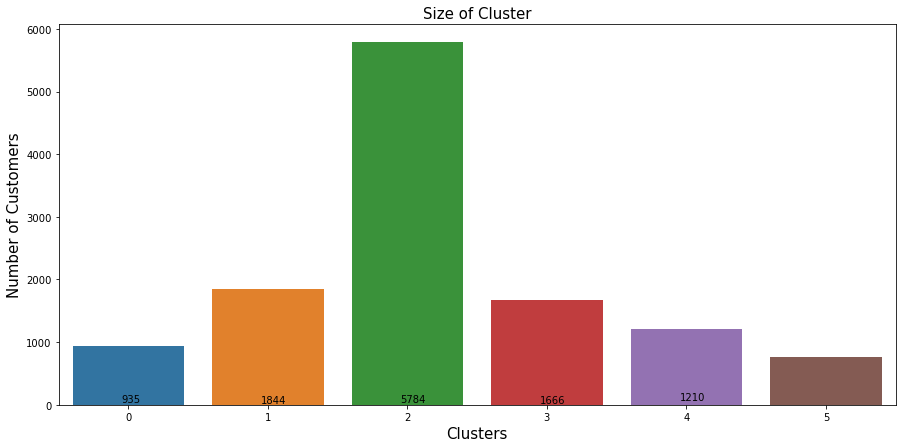

In [207]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])

# display the plot
plt.show()

In [208]:
# The 2nd cluster is the largest cluster containing 5784 observations.

In [209]:
df_num_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.239776,-0.794017,-0.896370,-0.765321
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.310240,-0.136980,-0.209237,-0.896370,-0.516347
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,2.068612,-0.794017,2.433853,-0.267374
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.310240,0.965816,-0.209237,-0.480092,-0.018400
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.310240,0.965816,0.375543,-0.896370,-0.018400


In [210]:
df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.673504,-1.239776,-0.794017,-0.896370,-0.765321,0.409670,-0.553088
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.310240,-1.673504,-0.136980,-0.209237,-0.896370,-0.516347,0.409670,-0.553088
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.673504,2.068612,-0.794017,2.433853,-0.267374,0.409670,-0.553088
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.310240,-1.673504,0.965816,-0.209237,-0.480092,-0.018400,0.409670,-0.553088
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.310240,-1.673504,0.965816,0.375543,-0.896370,-0.018400,0.409670,1.808031


In [211]:
df_new = df_scaled

### DENDOGRAM

In [212]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(df_new, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[3.91000000e+02 1.29200000e+03 3.38625837e-03 2.00000000e+00]
 [3.54900000e+03 5.09200000e+03 6.25155391e-03 2.00000000e+00]
 [8.52000000e+02 1.24800000e+03 7.29347956e-03 2.00000000e+00]
 [2.26300000e+03 3.01900000e+03 7.81444238e-03 2.00000000e+00]
 [3.04000000e+02 1.33100000e+03 7.81444238e-03 2.00000000e+00]
 [6.69000000e+02 9.79000000e+02 8.76954088e-03 2.00000000e+00]
 [1.47100000e+03 1.56500000e+03 8.85636803e-03 2.00000000e+00]
 [1.03200000e+03 1.51700000e+03 1.44306703e-02 2.00000000e+00]
 [7.76000000e+02 9.89000000e+02 1.66708104e-02 2.00000000e+00]
 [7.73000000e+02 1.17700000e+03 1.77127361e-02 2.00000000e+00]]


In [213]:
#### Let us visualize the clusters by considering the variables 'BounceRates' and 'ExitRates'.

In [ ]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        

# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

In [229]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Cluster'],
      dtype='object')

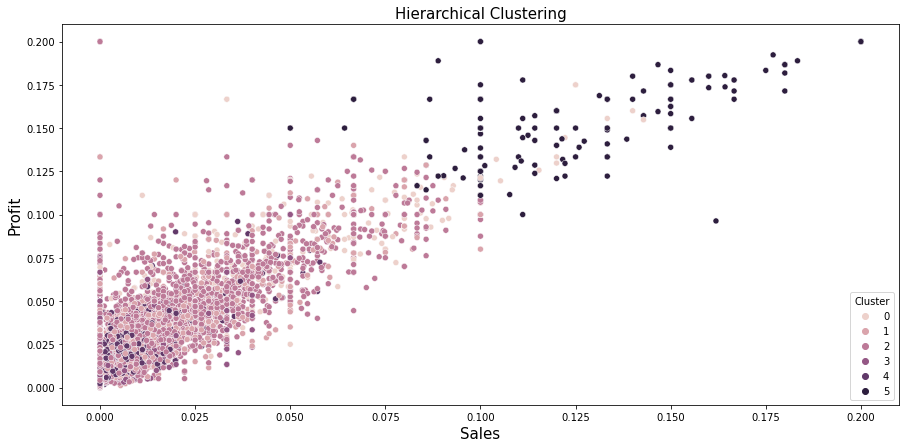

In [230]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'BounceRates', y = 'ExitRates', data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

# display the plot
plt.show()

### 3. Principal Component Analysis (PCA)

In [218]:
# generate the covariance matrix using 'cov' function
# consider the transpose of the dataframe 'df_attr_std' to obtain the covarinace between the independent variables (columns)  
cov_mat = np.cov(df_scaled.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00008194  0.60050601  0.37528709  0.25483339  0.42833977  0.3711768
  -0.21311378 -0.31128015  0.09702491 -0.09695881  0.09443105 -0.0065864
  -0.02562367 -0.0072622  -0.03464589 -0.02349438  0.02382726]
 [ 0.60050601  1.00008194  0.30144321  0.23723021  0.28688668  0.3536119
  -0.13692437 -0.20198803  0.06623377 -0.07467185  0.05625487 -0.00753009
  -0.01574326 -0.00673004 -0.01499178 -0.02240932  0.01326046]
 [ 0.37528709  0.30144321  1.00008194  0.61869911  0.37260217  0.38608336
  -0.10910436 -0.15944174  0.04741023 -0.04935429  0.0621776  -0.00972154
  -0.03879028 -0.03031972 -0.03520006  0.05732326  0.0343623 ]
 [ 0.25483339  0.23723021  0.61869911  1.00008194  0.27910523  0.34662463
  -0.06988356 -0.10286088  0.03009244 -0.03126391  0.04355586 -0.00973482
  -0.01957418 -0.02789321 -0.02512796  0.04559975  0.02319518]
 [ 0.42833977  0.28688668  0.37260217  0.27910523  1.00008194  0.86040036
  -0.19289993 -0.28610573  0.05420572 -0.02584085  0.15433569  0.00419439
  -0.013587

In [219]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [3.41889387 1.81314255 0.08513757 0.12362543 0.35212764 0.42218255
 1.40526653 1.23384475 0.67429385 1.11101108 0.75928842 0.82069326
 0.87969114 0.92294185 1.01708419 0.98944554 0.97272276] 

Eigenvectors: 
 
 [[-3.78729285e-01  3.48637906e-02 -2.88402145e-02 -1.67410274e-01
   4.46404436e-01 -5.79275496e-01  3.76295679e-02 -6.88145296e-02
   1.15137702e-01 -1.96146437e-01 -7.95956126e-03 -7.36464242e-02
  -9.81010173e-02  9.99182124e-02  3.79272395e-01  2.50540521e-01
  -4.53807886e-02]
 [-3.25072364e-01  7.86188814e-02 -2.40456679e-02  1.44851836e-01
  -3.03970329e-01  5.67125273e-01  4.74327211e-02 -8.78723025e-02
   1.17979389e-01 -2.69648824e-01 -4.25106969e-02 -7.16087678e-02
  -1.32401908e-01  1.40761031e-01  4.71172856e-01  2.95253174e-01
  -4.99951064e-02]
 [-3.44627544e-01  2.46669456e-01  2.68693912e-03 -2.83900144e-02
  -6.31993636e-01 -3.90931617e-01 -1.61566636e-02 -6.95454725e-02
   5.23813716e-02 -3.24116857e-01  2.17163465e-03 -4.22970486e-02
   4.944

In [220]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[3.418893870141734, 1.8131425519803621, 1.4052665262444484, 1.2338447468425167, 1.1110110757945404, 1.0170841866695723, 0.9894455430654991, 0.9727227598735126, 0.9229418499815591, 0.8796911414821561, 0.820693264176737, 0.7592884212782121, 0.6742938522491613, 0.4221825544348069, 0.35212764140672925, 0.1236254279733299, 0.08513757231138452]


To decide the number of components, we can use different methods as: `Kaiser criterion`, `Scree plot`, `Percentage of Explained Variation`.

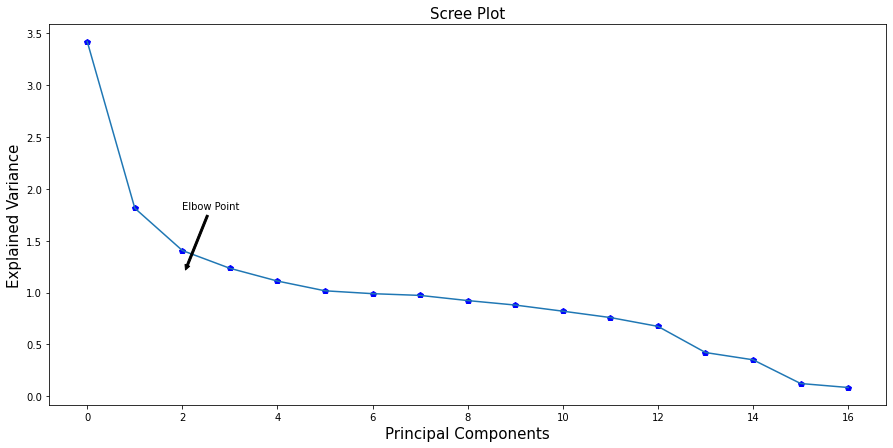

In [221]:
# HERE WE USE THE SCREE PLOT
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# display the plot
plt.show()   

In [222]:
# calculate the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[20.109492633785436,
 10.664670556603289,
 8.26559639795033,
 7.257315608581859,
 6.534823803646803,
 5.982357960390129,
 5.819791024686772,
 5.72142977154799,
 5.428624882364963,
 5.174229795237357,
 4.8272118929141365,
 4.4660365295222775,
 3.966109440609568,
 2.483223314611843,
 2.0711693547618975,
 0.7271488170164194,
 0.5007682157689166]

In [223]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 20.10949263,  30.77416319,  39.03975959,  46.2970752 ,
        52.831899  ,  58.81425696,  64.63404799,  70.35547776,
        75.78410264,  80.95833243,  85.78554433,  90.25158086,
        94.2176903 ,  96.70091361,  98.77208297,  99.49923178,
       100.        ])

 **Interpretation** :We can see that the first five components explain approximately 70% of the variation in the data. By considering the 2 components as per the scree plot, the components explain approximately 30% of the variation. To explain 95% of the variation in the data, we need to consider thirteen principal components.

For this dataset, let us choose the `five` principal components that explain 70% of the variation.

In [ ]:
eigenvector = eig_vec[:,[0,1,8,9,10]]

# print the vectors
eigenvector

In [224]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 5, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df_new)

In [225]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.457374,3.821567,-1.581109,-1.523925,0.403619
1,-1.586651,0.320535,-1.178664,0.574411,0.129700
2,-3.601129,3.712015,1.454816,-0.681575,0.874104
3,-2.224446,1.392253,-0.032701,0.365205,0.328652
4,-1.146660,-0.025258,-0.149241,0.936507,0.506019


In [227]:
df_pca_sklearn.shape

(12205, 5)

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 12205 observations and 5 columns. 

In [231]:
# BUILDING THE K MEANS AGAIN WITH 5 CLUSTERS

In [233]:
km=KMeans(n_clusters=5,random_state=1)
km.fit(df_new)

KMeans(n_clusters=5, random_state=1)

In [234]:
km.labels_

array([3, 4, 3, ..., 1, 1, 2])

In [235]:
km.inertia_

144404.54831896716

In [237]:
y_means = km.fit_predict(df_new)

In [250]:
# append the cluster label for each point in the dataframe 'df_cust'
df_new['Cluster for 5'] = km.labels_

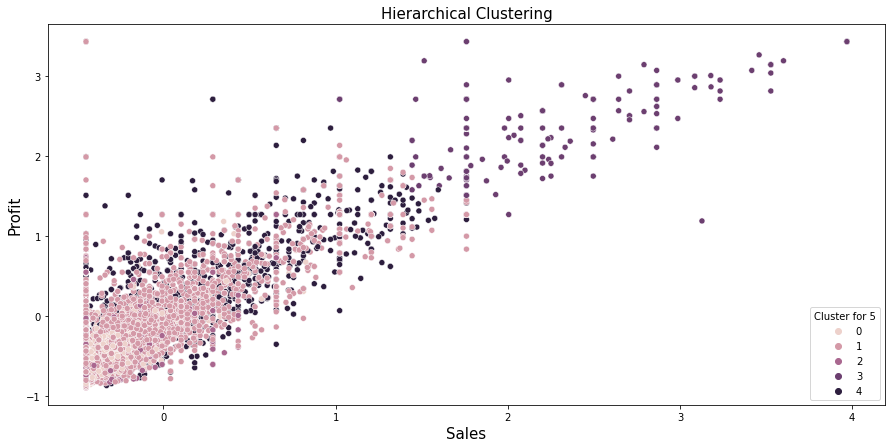

In [251]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'BounceRates', y = 'ExitRates', data = df_new, hue = 'Cluster for 5')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

# display the plot
plt.show()

In [239]:
# BUILDING K MEANS WITH SILHOUETTE BEST SCORE 2
km_2=KMeans(n_clusters=2,random_state=1)
km_2.fit(df_new)

KMeans(n_clusters=2, random_state=1)

In [240]:
km_2.inertia_

183863.44807948347

In [242]:
results = km_2.labels_
results = pd.DataFrame(results,columns=['cluster'])
obs = results.groupby('cluster').size()
obs

cluster
0    10302
1     1903
dtype: int64

In [243]:
# append the cluster label for each point in the dataframe 'df_cust'
df_new['Cluster for 2'] = km_2.labels_

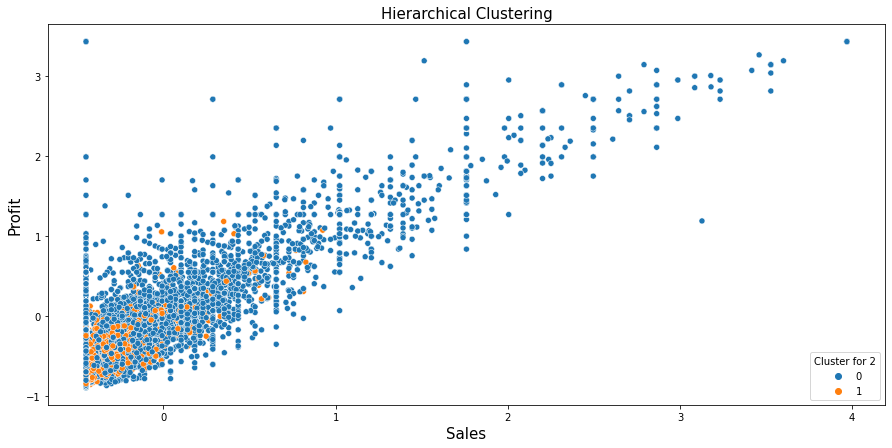

In [244]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'BounceRates', y = 'ExitRates', data = df_new, hue = 'Cluster for 2')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

# display the plot
plt.show()

<BarContainer object of 2 artists>

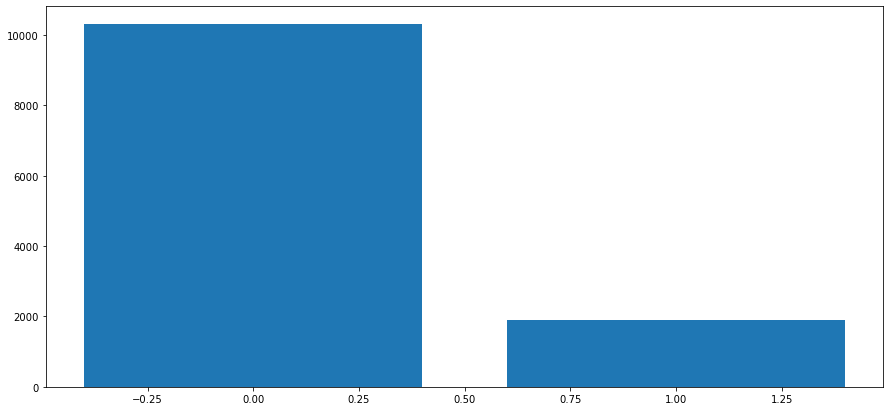

In [248]:
plt.bar(range(0,2),obs)


In [252]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(df_num_scaled)

AgglomerativeClustering()

In [255]:
# add a column containing cluster number to the original data
df_num_scaled['CLUSTER'] = clusters.labels_

# print head() of the newly formed dataframe
df_num_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,CLUSTER
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.239776,-0.794017,-0.896370,-0.765321,1
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.310240,-0.136980,-0.209237,-0.896370,-0.516347,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,2.068612,-0.794017,2.433853,-0.267374,1
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.310240,0.965816,-0.209237,-0.480092,-0.018400,1
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.310240,0.965816,0.375543,-0.896370,-0.018400,0


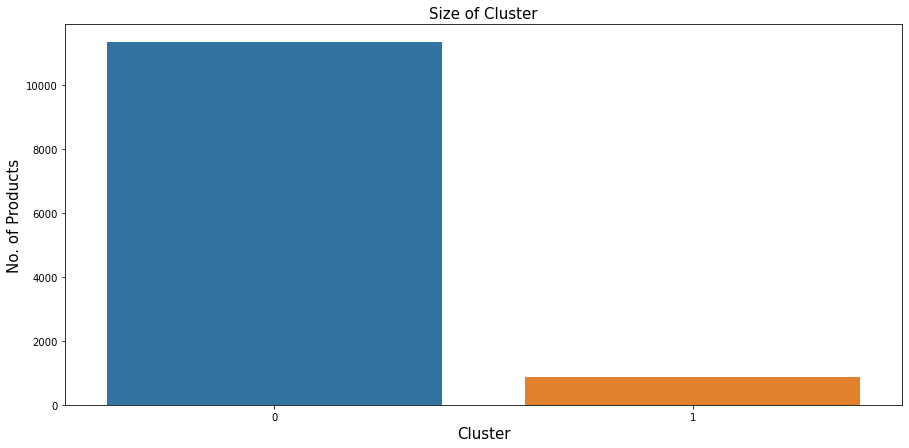

In [257]:
# plot the countplot for the cluster size
sns.countplot(data = df_num_scaled, x = 'CLUSTER')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

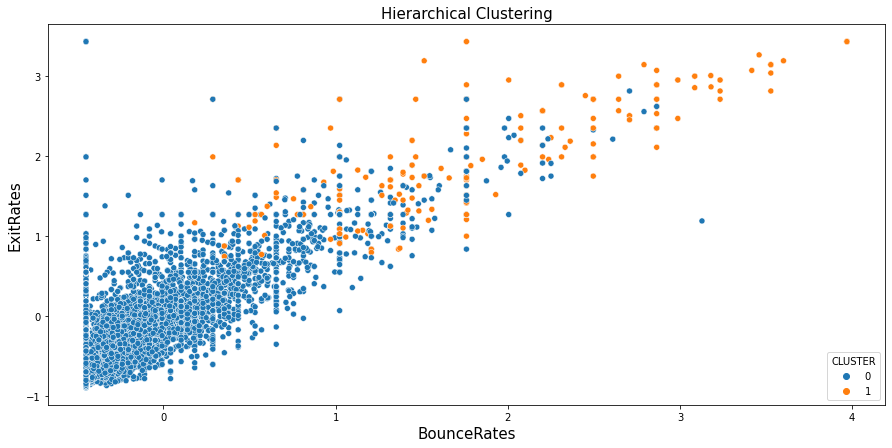

In [261]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'BounceRates', y = 'ExitRates', data = df_num_scaled, hue = 'CLUSTER')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('BounceRates', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)

# display the plot
plt.show()

In [267]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters6 = AgglomerativeClustering(n_clusters=5, linkage='ward')

# fit the model on the scaled data
clusters6.fit(df_num_scaled)

AgglomerativeClustering(n_clusters=5)

In [268]:
# add a column containing cluster number to the original data
df_num_scaled['CLUSTER6'] = clusters6.labels_

# print head() of the newly formed dataframe
df_num_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,CLUSTER,CLUSTER6
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,-1.239776,-0.794017,-0.896370,-0.765321,1,2
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.310240,-0.136980,-0.209237,-0.896370,-0.516347,0,1
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240,2.068612,-0.794017,2.433853,-0.267374,1,2
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.310240,0.965816,-0.209237,-0.480092,-0.018400,1,2
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.310240,0.965816,0.375543,-0.896370,-0.018400,0,1


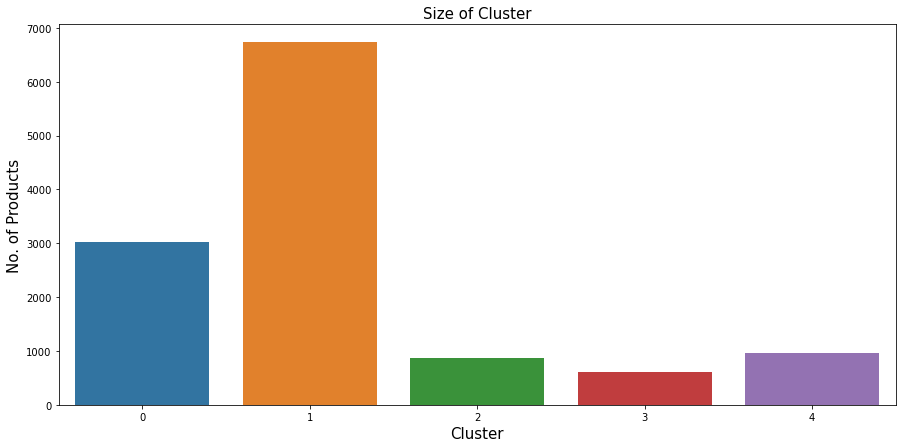

In [269]:
# plot the countplot for the cluster size
sns.countplot(data = df_num_scaled, x = 'CLUSTER6')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

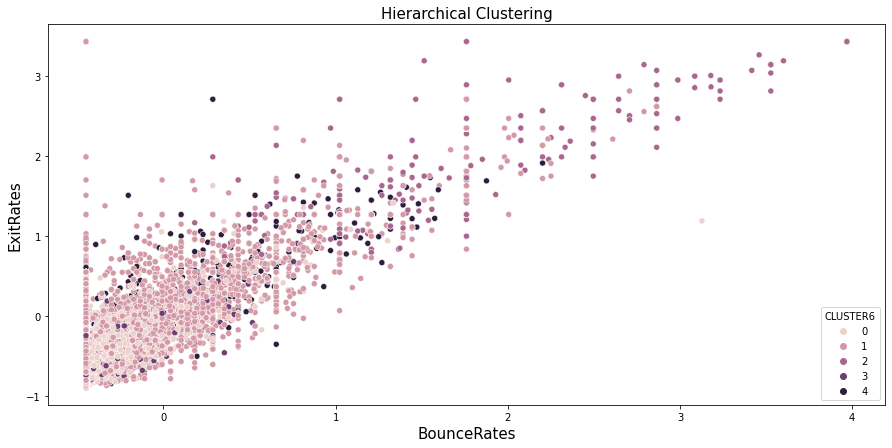

In [270]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'BounceRates', y = 'ExitRates', data = df_num_scaled, hue = 'CLUSTER6')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('BounceRates', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)

# display the plot
plt.show()

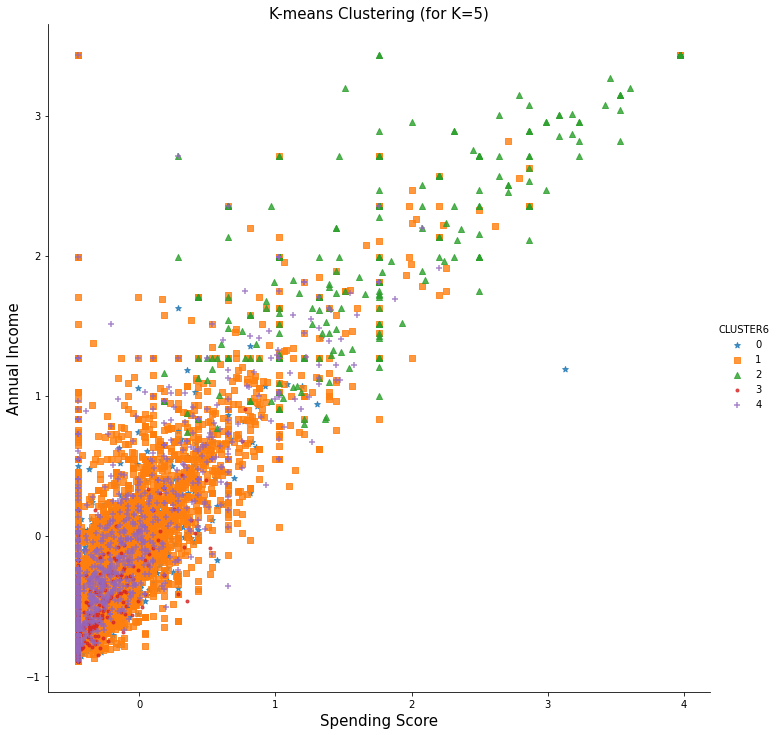

In [272]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'BounceRates', y = 'ExitRates', data = df_num_scaled, hue = 'CLUSTER6', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)

# display the plot
plt.show()

In [273]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 5, random_state = 10)

# fit the model
new_clusters.fit(df_num_scaled)

# append the cluster label for each point in the dataframe 'df_cust'
df['Cluster_new'] = new_clusters.labels_

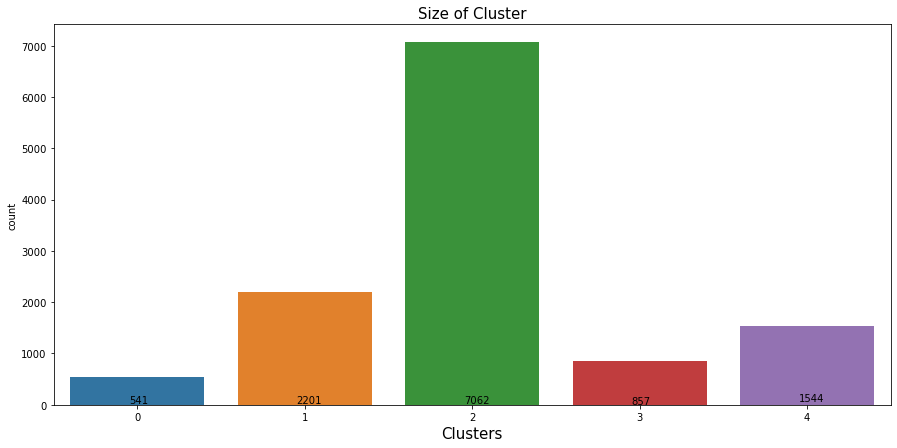

In [275]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df, x = 'Cluster_new')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)


# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])

# display the plot
plt.show()

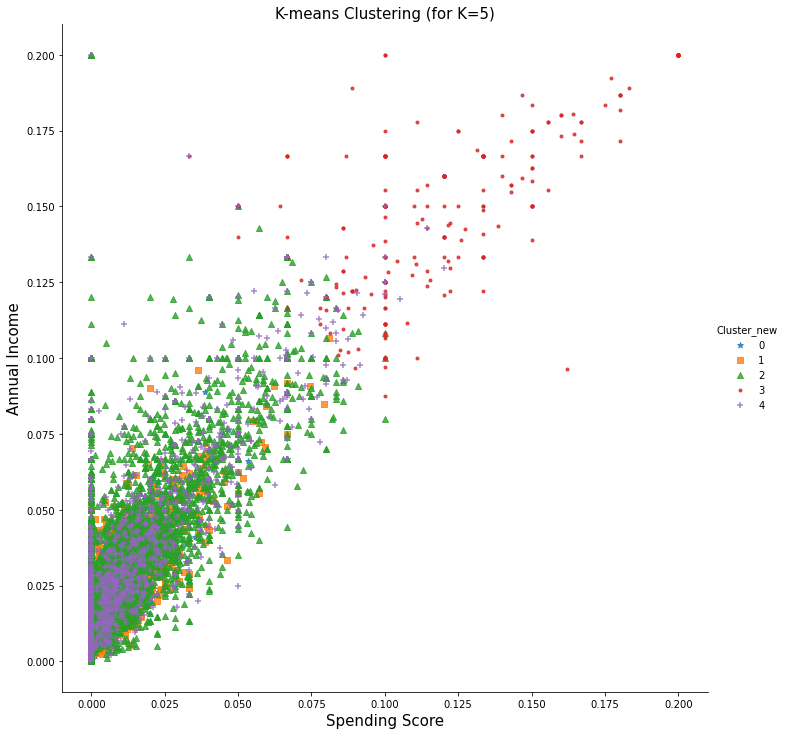

In [277]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'BounceRates', y = 'ExitRates', data = df, hue = 'Cluster_new', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# SINCE WE DID NOT REMOVE THE 